# Задача 2 #
*Имеется участок с N станками. Среднее время между наладками составляет Tc минут, среднее время наладки – Ts минут. Все потоки случайных событий считать пуассоновскими. Построить графики от числа наладчиков: математического ожидания числа простаивающих станков; математического ожидания числа станков, ожидающих обслуживания; вероятности ожидания обслуживания; математического ожидания числа занятых наладчиков; коэффициента занятости наладчиков.*

## Исходные данные и подгрузка библиотек для расчета и визуализации

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [22]:
number = 1
day_of_birth = 9
month_of_birth = 1
#t_c среднее время между поступлением заявок, t_s - средняя продолжительность обслуживания заявки
t_c = 100 + number
t_s = 25+ day_of_birth
#Число станков
N = 30+month_of_birth
print(f"ВАРИАНТ:\nTc = {t_c} минут \nTs = {t_s} минут\nN = {N} штук")

ВАРИАНТ:
Tc = 101 минут 
Ts = 34 минут
N = 31 штук


## Рассчетная и графическая часть

In [23]:
#lmbd - интенсивность поступления заявок, mu - интенсивность обслуживания заявок
lmbd=1/t_c
mu=1/t_s
lmbd_mu = lmbd/(mu)

print(f"Интенсивность поломок: {lmbd} поломок в минуту\n\
Интенсивность наладки: {mu} наладок в минуту\n")
print(lmbd_mu)

Интенсивность поломок: 0.009900990099009901 поломок в минуту
Интенсивность наладки: 0.029411764705882353 наладок в минуту

0.33663366336633666


In [24]:
n=31 #не более

#pi_p0 = np.array([(((math.factorial(N)*pow(lmbd_mu,j+1))/(math.factorial(j+1)*math.factorial(N-(j+1))))) if j<=i else  ])
i_iter = np.arange(1,n+1)
pi_p0 = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
            if j<=i:
                pi_p0[i][j]=(((math.factorial(n)*pow(lmbd_mu,j+1))/(math.factorial(j+1)*math.factorial(n-(j+1)))))
            else:            
                pi_p0[i][j]=(((math.factorial(n)*pow(lmbd_mu,j+1))/(pow(i+1,(j+1-(i+1)))*math.factorial(i+1)*math.factorial(n-(j+1)))))

p_0 = np.array([(1/(1+pi_p0[i].sum())) for i in range(0,n)])

m_pr = np.array([np.dot(i_iter,pi_p0[i])*p_0[i] for i in range (0,n)])

n_iter = i_iter

i_n_iter = np.array([i_iter[j]-n_iter[i] for i in range (0,n) for j in range(0,n)]).reshape(n,n)

m_o = np.array([np.dot(i_n_iter[i][i+1:N],pi_p0[i][i+1:N])*p_0[i] if (i != N-1) else 0 for i in range(0,n)])

rev = np.arange(0,N)[::-1]
p_q = np.array([1-(1/(N-m_pr[0]))*N*p_0[0] if (i==0) else (1-(1/(N-m_pr[i]))*(N*p_0[i]+p_0[i]*np.dot(pi_p0[i][0:i],rev[0:i]))) for i in range(0,n) ]) 

n_i_iter = (-1)*i_n_iter

m_z = np.array([(i+1)-((i+1)*p_0[i]+p_0[i]*np.dot(n_i_iter[i][0:i],pi_p0[i][0:i])) for i in range(0,n)])

k_z = np.array([m_z[i]/(i+1) for i in range(0,N)])




Формирование таблицы для графиков

In [25]:
final_table = pd.DataFrame(list(zip(i_iter, m_pr, m_o, p_q, m_z, k_z)),columns =['Число наладчиков', 'Матожидание числа простаивающих станков', 'Матожидание числа станков, ожидающих обслуживания','Вероятность образования очереди' ,'Матожидание числа занятых наладчиков', 'Коэффициент занятости наладчиков'])
final_table.head(35)


,Число наладчиков,Матожидание числа простаивающих станков,"Матожидание числа станков, ожидающих обслуживания",Вероятность образования очереди,Матожидание числа занятых наладчиков,Коэффициент занятости наладчиков
0,1,28.029412,2.702941e+01,1.000000e+00,1.000000,1.000000
1,2,25.058824,2.305882e+01,1.000000e+00,2.000000,1.000000
2,3,22.088236,1.908824e+01,9.999998e-01,3.000000,1.000000
3,4,19.117800,1.511785e+01,9.999071e-01,3.999948,0.999987
4,5,16.156982,1.116032e+01,9.958426e-01,4.996660,0.999332
5,6,13.320476,7.368954e+00,9.567595e-01,5.951523,0.991920
6,7,10.975196,4.234173e+00,8.279823e-01,6.741023,0.963003
7,8,9.422221,2.158414e+00,6.213982e-01,7.263807,0.907976
8,9,8.564382,1.011798e+00,4.077324e-01,7.552584,0.839176
9,10,8.139756,4.442284e-01,2.376994e-01,7.695528,0.769553


array([<Axes: xlabel='Число наладчиков'>,
       <Axes: xlabel='Число наладчиков'>,
       <Axes: xlabel='Число наладчиков'>,
       <Axes: xlabel='Число наладчиков'>,
       <Axes: xlabel='Число наладчиков'>], dtype=object)

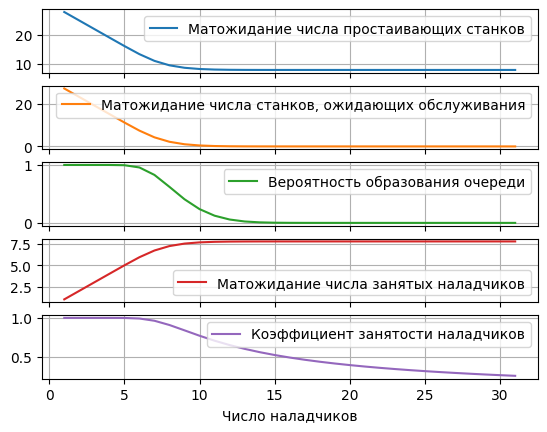

In [26]:
final_table.plot(x='Число наладчиков',y= ['Матожидание числа простаивающих станков', 'Матожидание числа станков, ожидающих обслуживания','Вероятность образования очереди' ,'Матожидание числа занятых наладчиков', 'Коэффициент занятости наладчиков'], grid = True, subplots = True)